# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the Dataset

In [2]:
file = "data.csv"

# Read dataset to pandas dataframe
dataset = pd.read_csv(file)
dataset.head()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


# Preprocessing

In [3]:
X = dataset.iloc[:, 1:14].values
y = dataset.iloc[:, 14].values

## Train, Validation and Test Split

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=0.2, random_state = 109)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=0.5, random_state = 10)

## Feature Scaling

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

In [5]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train, norm='l1')
X_valid_test = normalize(X_valid_test, norm='l1')
X_valid = normalize(X_valid, norm='l1')
X_test = normalize(X_test, norm='l1')
print(X_train.shape)
print(X_valid_test.shape)
print(X_valid.shape)
print(X_test.shape)

(690, 13)
(173, 13)
(86, 13)
(87, 13)


# First: Using the K-Nearest Neighbors classifier

## Comparing Error Rate and Recall Score with the K Value on the Validation Set

Text(0, 0.5, 'Mean Error')

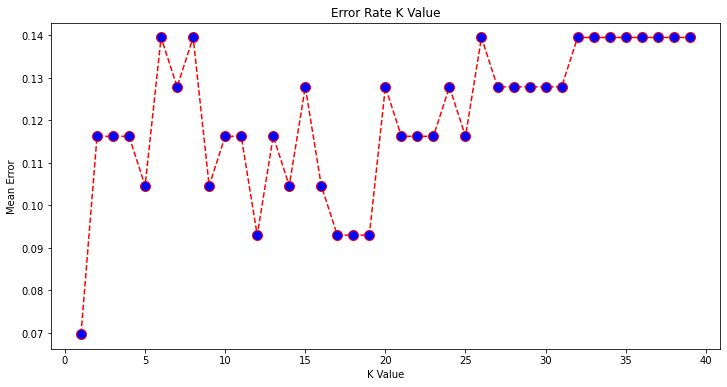

In [6]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_valid)
    error.append(np.mean(pred_i != y_valid))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Recall')

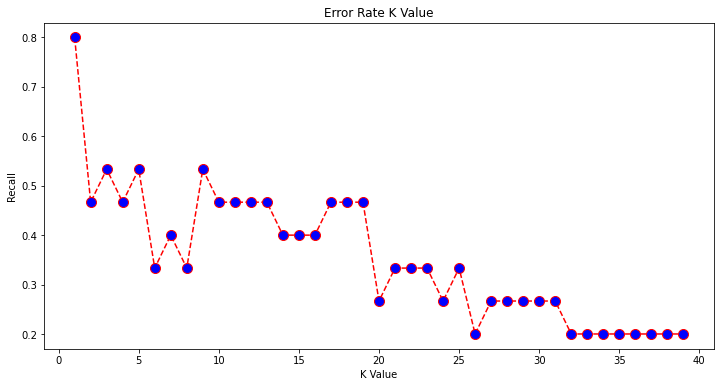

In [7]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
recall = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_valid)
    recall.append(metrics.recall_score(y_valid, pred_i))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), recall, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Recall')

## Training and Predictions on the Test Set

It is clear from the plots above that the best value we can use for this model is K = 1

In [8]:
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Model Evaluation and Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

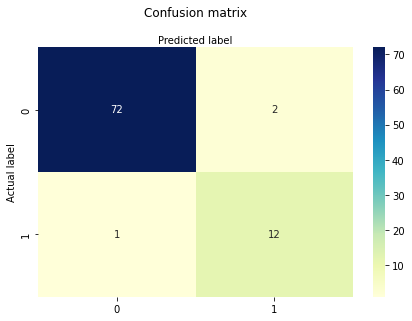

In [9]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Confusion Matrix Evaluation Metrics

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        74
           1       0.86      0.92      0.89        13

    accuracy                           0.97        87
   macro avg       0.92      0.95      0.93        87
weighted avg       0.97      0.97      0.97        87



## ROC Curve

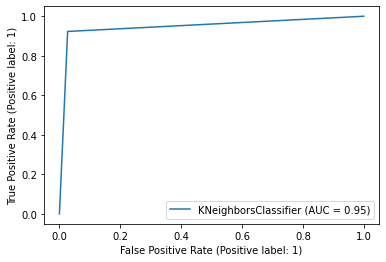

In [11]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(classifier, X_test, y_test)
plt.show()

# Second: Using the Logistic Regression classifier

## Model Development and Hyperparameter Tuning Using the Validation Set

In [12]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(class_weight = {0 : 1, 1 : 3.2}, penalty='none', max_iter = 10000)
# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_valid)

## Model Evaluation and Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

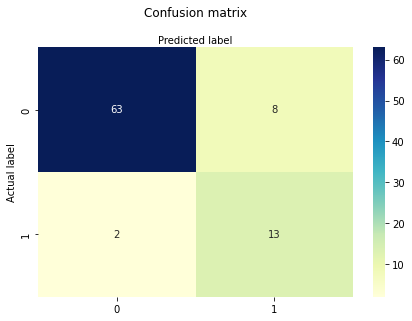

In [13]:
cnf_matrix = metrics.confusion_matrix(y_valid, y_pred)

import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Testing the Model on the Test Set

Text(0.5, 257.44, 'Predicted label')

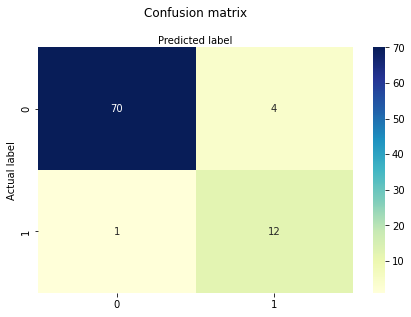

In [14]:
y_pred=logreg.predict(X_test)

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Confusion Matrix Evaluation Metrics

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        74
           1       0.75      0.92      0.83        13

    accuracy                           0.94        87
   macro avg       0.87      0.93      0.90        87
weighted avg       0.95      0.94      0.94        87



## ROC Curve

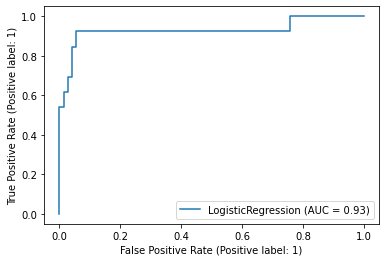

In [16]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg, X_test, y_test)
plt.show()

# Third: Using the Naïve Bayes classifier

## Generating Model

In [17]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB


#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_valid_test)

## Model Evaluation and Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

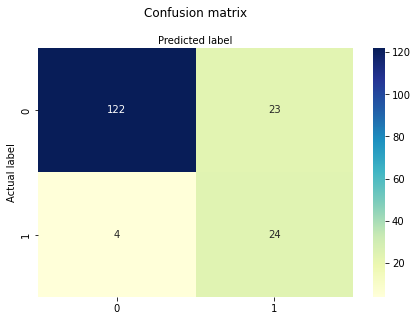

In [18]:
cnf_matrix = metrics.confusion_matrix(y_valid_test, y_pred)

import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Confusion Matrix Evaluation Metrics

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_valid_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       145
           1       0.51      0.86      0.64        28

    accuracy                           0.84       173
   macro avg       0.74      0.85      0.77       173
weighted avg       0.89      0.84      0.86       173



## ROC Curve

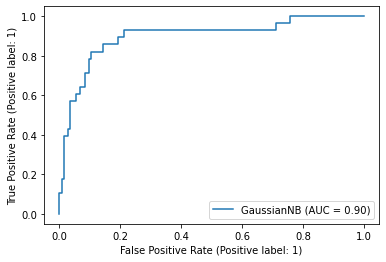

In [20]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(gnb, X_valid_test, y_valid_test)
plt.show()